In [7]:
! pip install pandas numpy openpyxl scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [32]:
# === Step 1: Load Data ===
# Replace this with your actual CSV file
df = pd.read_excel("./data/Canada examples data.xlsx", sheet_name="normalized")
df = df.iloc[:, 3:]
df = df.fillna(0)
df.head()

,Time spent in school,Which age group does your child fall under?,No. of media devices owned,Parent total media use- weekday,Parent total media use- weekend day,Average parent media use for work,Average parent media use for entertainment,Average parent media use for social networking,Average parent media use for personal development,First exposure to fixed screens (mths),...,Child age (total mths),Average sleep duration,"Poorer sleep quality on either day (1= unsatisfactory, 2= below average, 3= average, 4= above average, 5= excellent)",Total Health QofL,Physical functioning,Psychosocial health,< 1h of screen use,At least 3h of physical activity,10-13h of sleep,No. of guidelines met
0,0,5 to 6 years,2,16.0,21.00,4.00,8.00,4.00,2.500,13.0,...,65.0,9.0,5,78.260870,100.000,66.666667,NO,YES,NO,1
1,0,5 to 6 years,3,7.5,5.50,3.00,1.00,1.50,1.000,13.0,...,58.0,7.5,2,70.652174,53.125,80.000000,NO,NO,NO,0
2,0,5 to 6 years,3,8.0,5.50,2.00,3.25,1.00,0.500,24.0,...,56.0,8.5,5,70.652174,68.750,71.666667,YES,NO,NO,1
3,0,5 to 6 years,3,7.5,5.00,1.25,3.50,1.00,0.500,18.0,...,51.0,9.0,3,93.478261,96.875,91.666667,NO,NO,NO,0
4,0,5 to 6 years,4,6.5,5.25,1.50,2.00,1.75,0.625,24.0,...,61.0,10.0,5,82.608696,100.000,73.333333,YES,NO,YES,2


In [33]:
for col in df.columns.to_list():
    print(col)

Time spent in school
Which age group does your child fall under?
No. of media devices owned
Parent total media use- weekday
Parent total media use- weekend day
Average parent media use for work
Average parent media use for entertainment
Average parent media use for social networking
Average parent media use for personal development
First exposure to fixed screens (mths)
First exposure to mobile screens (mths)
Child total media use- weekday
Child total media use- weekend day
Child average total media use
Child Average media use for educational learning
Child Average media use for entertainment
Child average media use for media creation
Child average media use for communication
Average % of parent-child digital media engagement
Child total non-digital media use- weekday
Child total non-digital media use- weekend day
Child average time spent on afternoon naps
Child average time spent on reading printed books
Child average time spent on drawing
Child average time spent on household chores


In [34]:
df['Average physical activity'] = df['Child average time spent on household chores'] + df['Child total time spent on physical play (indoor & outdoor)']
df.head()

,Time spent in school,Which age group does your child fall under?,No. of media devices owned,Parent total media use- weekday,Parent total media use- weekend day,Average parent media use for work,Average parent media use for entertainment,Average parent media use for social networking,Average parent media use for personal development,First exposure to fixed screens (mths),...,Average sleep duration,"Poorer sleep quality on either day (1= unsatisfactory, 2= below average, 3= average, 4= above average, 5= excellent)",Total Health QofL,Physical functioning,Psychosocial health,< 1h of screen use,At least 3h of physical activity,10-13h of sleep,No. of guidelines met,Average physical activity
0,0,5 to 6 years,2,16.0,21.00,4.00,8.00,4.00,2.500,13.0,...,9.0,5,78.260870,100.000,66.666667,NO,YES,NO,1,16.000
1,0,5 to 6 years,3,7.5,5.50,3.00,1.00,1.50,1.000,13.0,...,7.5,2,70.652174,53.125,80.000000,NO,NO,NO,0,2.375
2,0,5 to 6 years,3,8.0,5.50,2.00,3.25,1.00,0.500,24.0,...,8.5,5,70.652174,68.750,71.666667,YES,NO,NO,1,2.500
3,0,5 to 6 years,3,7.5,5.00,1.25,3.50,1.00,0.500,18.0,...,9.0,3,93.478261,96.875,91.666667,NO,NO,NO,0,1.250
4,0,5 to 6 years,4,6.5,5.25,1.50,2.00,1.75,0.625,24.0,...,10.0,5,82.608696,100.000,73.333333,YES,NO,YES,2,2.000


In [35]:
# === Step 3: Define Predictors and Target ===
# Replace with your actual column names

predictor_cols = [
    'Average physical activity',        # example physical activity
    'Child average total media use',      # screen time
    'Average sleep duration'    # sleep duration
]

target_col = 'Total Health QofL'  # Replace with your actual target column

In [46]:
# === Step 4: Clean Data ===

df = df.dropna(subset=predictor_cols + [target_col])

# Optional: Convert QoL_score to multiple categories (for classification)
# Use this block if you want a classification tree (e.g. Low/Medium/High QoL)
def convert_to_categories(score):
    if score < 50:
        return 'Low'
    elif score < 75:
        return 'Medium'
    else:
        return 'High'

df['QoL_category'] = df[target_col].apply(convert_to_categories)

In [47]:
# === Step 5: Split into Train/Test ===

X = df[predictor_cols]

# Choose either y_reg (for regression) or y_class (for classification)
y_reg = df[target_col]
y_class = df['QoL_category']

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [48]:
# === Step 5a: Train Regression Tree ===
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X_train, y_train_reg)

# === Step 5b: Train Classification Tree ===
class_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
class_tree.fit(X_train, y_train_class)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
# === Step 6a: Evaluate Regression ===

y_pred_reg = reg_tree.predict(X_test)
rmse = mean_squared_error(y_test_reg, y_pred_reg)
print("Regression RMSE:", rmse)

# === Step 6b: Evaluate Classification ===
y_pred_class = class_tree.predict(X_test)
acc = accuracy_score(y_test_class, y_pred_class)
print("Classification Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Regression RMSE: 306.5061229781333
Classification Accuracy: 0.5501002004008017
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.88      0.69       560
         Low       0.00      0.00      0.00        63
      Medium       0.44      0.15      0.22       375

    accuracy                           0.55       998
   macro avg       0.34      0.34      0.30       998
weighted avg       0.48      0.55      0.47       998



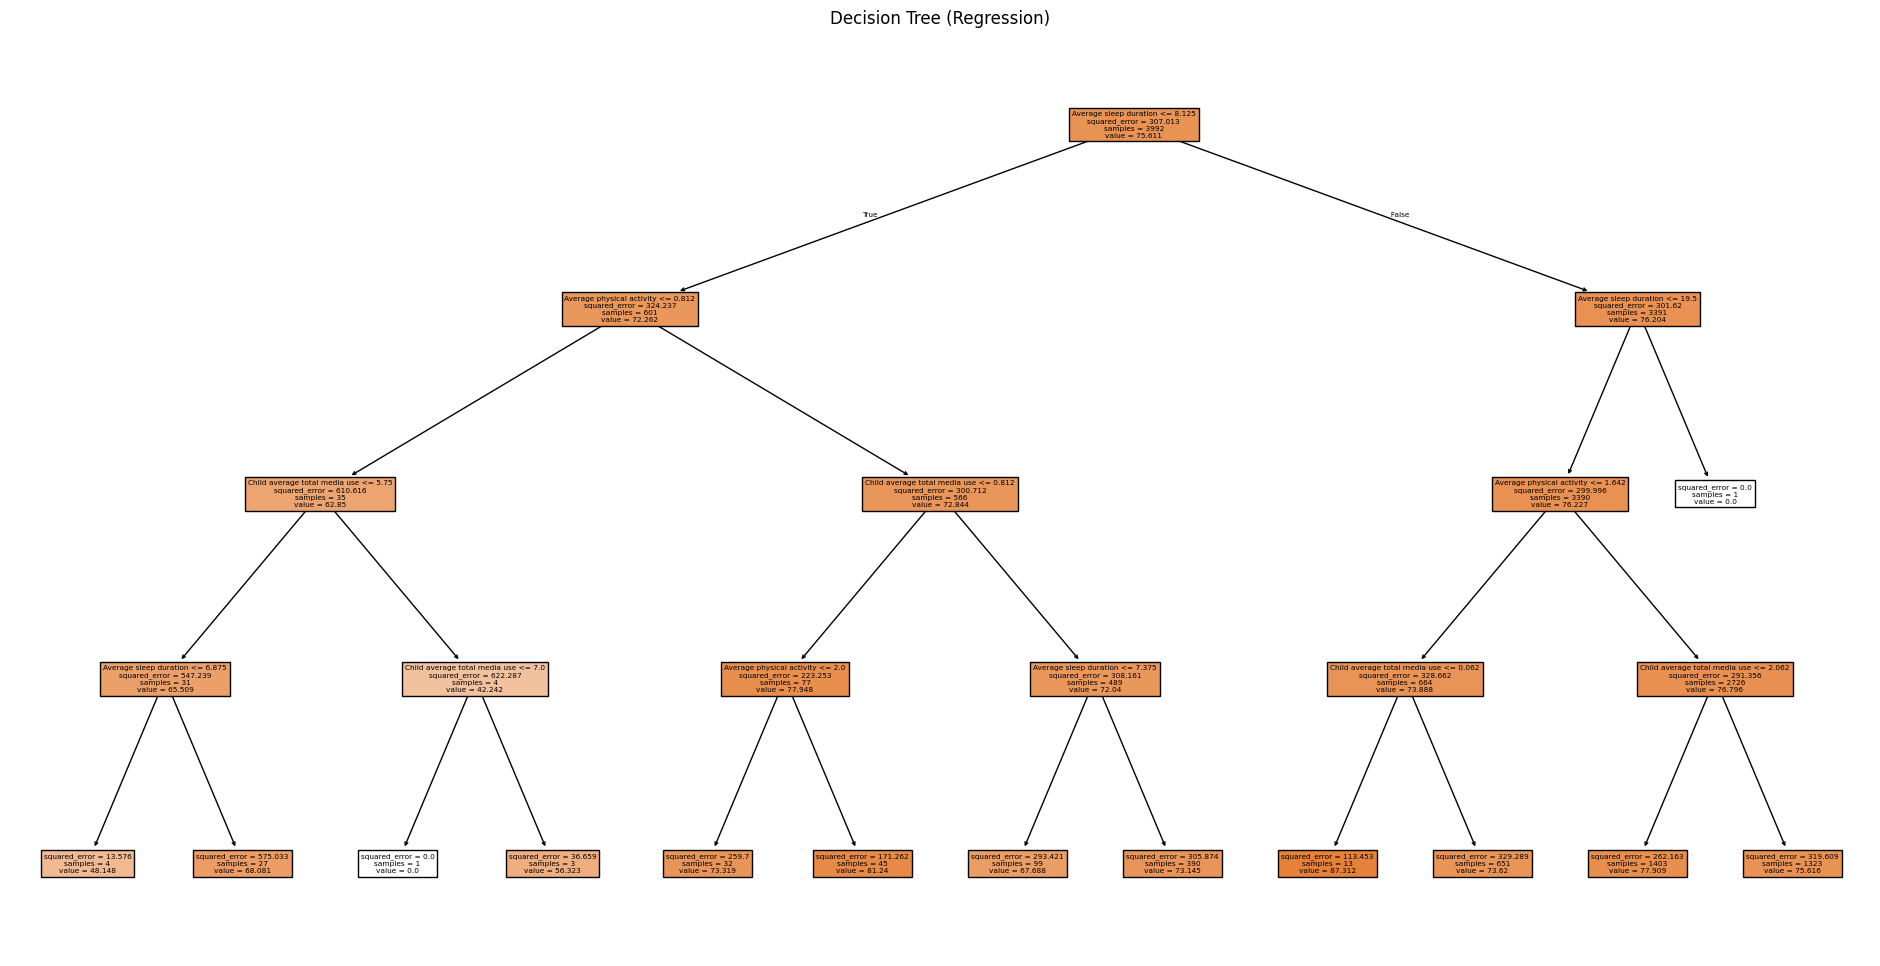

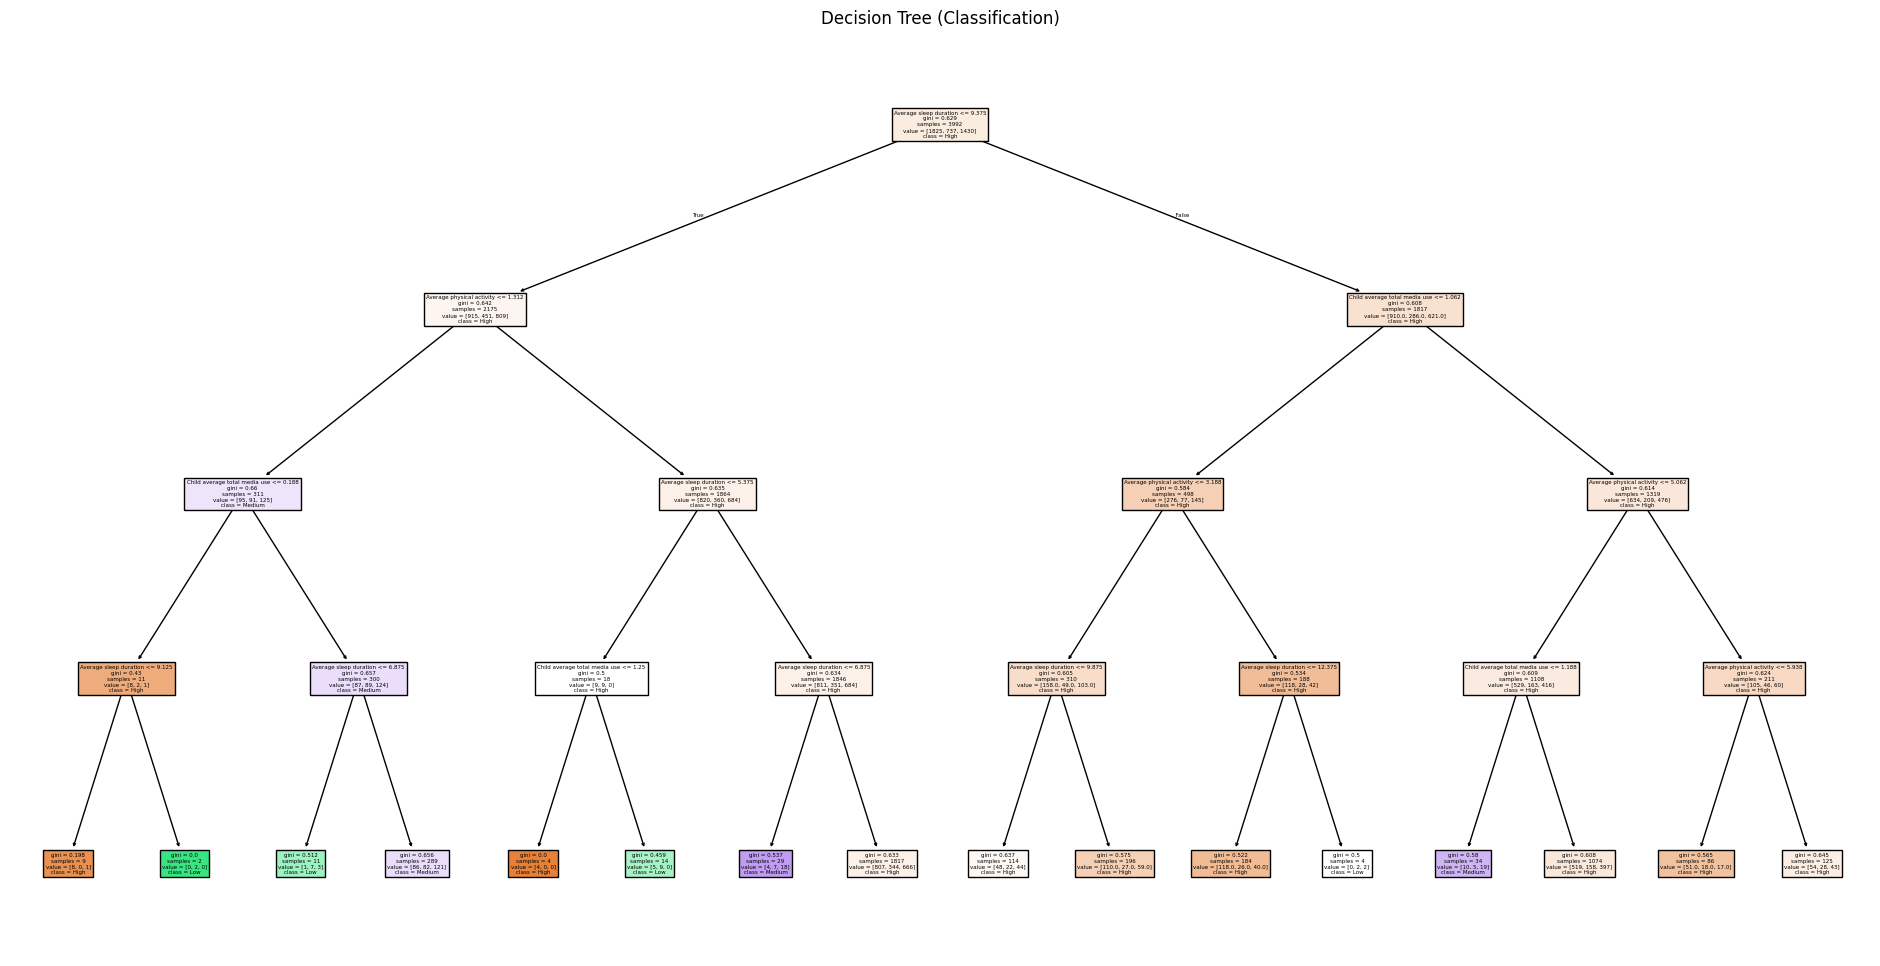

In [44]:
# === Step 7: Visualise the Trees ===

# Regression Tree
plt.figure(figsize=(24, 12))
plot_tree(reg_tree, feature_names=predictor_cols, filled=True)
plt.title("Decision Tree (Regression)")
plt.show()

# Classification Tree
plt.figure(figsize=(24, 12))
plot_tree(class_tree, feature_names=predictor_cols, class_names=class_tree.classes_, filled=True)
plt.title("Decision Tree (Classification)")
plt.show()

In [45]:
# === Step 8: Feature Importance ===
print("\nFeature Importance (Regression):")
print(pd.Series(reg_tree.feature_importances_, index=predictor_cols).sort_values(ascending=False))

print("\nFeature Importance (Classification):")
print(pd.Series(class_tree.feature_importances_, index=predictor_cols).sort_values(ascending=False))


Feature Importance (Regression):
Average sleep duration           0.447610
Child average total media use    0.322367
Average physical activity        0.230023
dtype: float64

Feature Importance (Classification):
Average sleep duration           0.504463
Average physical activity        0.281398
Child average total media use    0.214138
dtype: float64
